In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [19]:
ratings = pd.read_csv('data/game_ratings.csv')

In [20]:
ratings.head()

,critic_score,genres,platform,publisher,rating,release_date,title,user_score
0,96,Action\tShooter\tFirst-Person\tSci-Fi,pc,VU Games,M,"Nov 16, 2004",Half-Life 2,9.2
1,96,Sports\tTraditional\tBaseball\tManagement,pc,Sports Interactive,NaN,"Mar 23, 2006",Out of the Park Baseball 2007,2.9
2,96,Action\tShooter\tFirst-Person\tSci-Fi,pc,EA Games,M,"Oct 10, 2007",The Orange Box,9.4
3,96,Action\tShooter\tFirst-Person\tSci-Fi,pc,Sierra Entertainment,M,"Oct 31, 1998",Half-Life,9.1
4,96,Action\tShooter\tFirst-Person\tSci-Fi,pc,2K Games,M,"Aug 21, 2007",BioShock,8.3


In [21]:
ratings.describe()

,critic_score,user_score
count,12117.000000,12117.000000
mean,70.448626,6.239275
std,13.413865,2.835557
min,8.000000,0.000000
25%,63.000000,5.600000
50%,72.000000,7.300000
75%,80.000000,8.200000
max,99.000000,10.000000


In [22]:
reviews = pd.read_csv('data/game_reviews.csv')
del reviews['Unnamed: 0']
tbd_cond = reviews.meta_score == 'tbd'
current_reviews = reviews[~tbd_cond]
current_reviews.loc[:, 'meta_score'] = current_reviews.loc[:, 'meta_score'].astype(int)

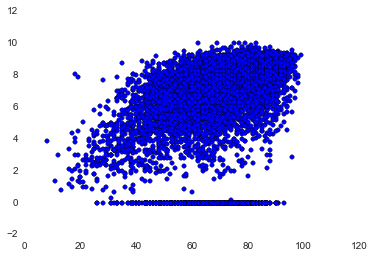

In [23]:
plt.scatter(ratings.critic_score, ratings.user_score)
plt.show()

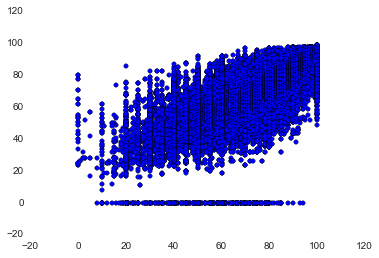

In [24]:
plt.scatter(current_reviews.critic_score, current_reviews.meta_score)
plt.show()

In [25]:
ratings.release_date.head()

0    Nov 16, 2004
1    Mar 23, 2006
2    Oct 10, 2007
3    Oct 31, 1998
4    Aug 21, 2007
Name: release_date, dtype: object

In [26]:
ratings.loc[:, 'release_date'] = pd.to_datetime(ratings.release_date)

In [27]:
ratings.release_date.head()

0   2004-11-16
1   2006-03-23
2   2007-10-10
3   1998-10-31
4   2007-08-21
Name: release_date, dtype: datetime64[ns]

In [28]:
ratings.platform.unique()

array(['pc', 'wii-u', 'xbox360', 'ps2', 'ps3', 'vita', '3ds', 'ios', 'ps4',
       'ds', 'ps', 'n64', 'dreamcast', 'gba', 'psp', 'gamecube', 'wii',
       'xbox'], dtype=object)

In [29]:
platform_columns = ['critic_score', 'user_score']
ratings.groupby('platform').mean().sort(platform_columns, ascending=False)[platform_columns].head()

,critic_score,user_score
platform,,
ps4,84.500000,0.000000
dreamcast,80.986486,7.922973
ps,79.020000,7.528000
gamecube,78.824490,8.027347
3ds,78.166667,7.570833


In [30]:
sort_columns = 'user_score'
group_columns = 'publisher'
grouper = ratings.groupby(group_columns)

grouper.mean().sort(sort_columns, ascending=False)[[sort_columns]].head()

,user_score
publisher,
Flat Black Films,10.0
Fireflame Games,9.8
Motion Twin,9.8
"Unigine Corp, Russia",9.5
Cinemaware,9.4


In [31]:
sales = pd.read_csv('data/game_sales.csv')

In [32]:
sales.head()

,europe_sales,genre,global_sales,japan_sales,n_america_sales,name,other_sales,platform,publisher,year
0,28.58,Sports,81.44,3.77,40.78,Wii Sports,8.30,Wii,Nintendo,2006
1,3.58,Platform,40.24,6.81,29.08,Super Mario Bros.,0.77,NES,Nintendo,1985
2,12.31,Racing,33.86,3.68,14.80,Mario Kart Wii,3.07,Wii,Nintendo,2008
3,10.64,Sports,31.85,3.23,15.16,Wii Sports Resort,2.83,Wii,Nintendo,2009
4,8.89,Role-Playing,31.37,10.22,11.27,Pokémon Red / Green / Blue Version,1.00,GB,Nintendo,1996


In [33]:
sales_year_cond = (sales.year >= 2005) & (sales.year <= 2015)
global_sales_cond = sales.global_sales > 0

sales_last10 = sales[sales_year_cond & global_sales_cond]
sales_last10.loc[:, 'year'] = sales_last10.loc[:, 'year'].astype(int)

sales_group_columns = 'year'
sales_grouper = sales_last10.groupby(sales_group_columns)
global_sales = sales_grouper.sum().sort('global_sales', ascending=False)[['global_sales']]
global_sales = global_sales.reset_index()

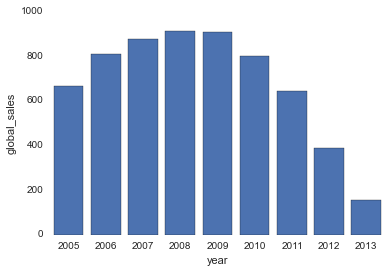

In [34]:
sns.barplot('year', 'global_sales', data=global_sales)
plt.show()

In [40]:
publications = pd.read_csv('data/publications.csv')
del publications['Unnamed: 0']

In [44]:
publications.sort('games_reviewed', ascending=False).head(10)

,average_score,games_reviewed,name
299,69,12347,IGN
324,68,9786,GameSpot
170,74,6580,GameZone
252,71,5881,Cheat Code Central
188,73,5611,Game Informer
254,71,4784,GameSpy
133,76,4571,GamePro
340,66,4424,Eurogamer
235,72,4212,Worth Playing
282,70,4051,Gaming Age


In [45]:
sim_data = pd.read_csv('data/sim_data.csv')

In [46]:
sim_data.head()

,Next Level Gaming,Grand Theft Auto: Vice City,100,95.83333333333333,79.5921568627451
0,Next Level Gaming,Metal Gear Solid 3: Subsistence,100,95.428571,79.592157
1,Next Level Gaming,The Legend of Zelda: Twilight Princess,100,95.000000,79.592157
2,Next Level Gaming,Halo: Combat Evolved,100,94.195652,79.592157
3,Next Level Gaming,Resident Evil 4,100,95.956522,79.592157
4,Next Level Gaming,Ratchet: Deadlocked,99,86.576923,79.592157
